# Analizing Some Aggregated Results of a 100 Runs of the EA

# Preliminaries
## Importing packages

In [1]:
import numpy as np

import seaborn as sns
#sns.set()
#sns.set_style('whitegrid')
#sns.set_context('notebook')
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

from thesis_EAfunc import *
from thesis_visfunc import *

In [2]:
import datetime
time_a = datetime.datetime.now()
print(time_a)

2019-05-12 10:40:31.225316


# Define landscape

In [3]:
#Problem domain
x_min = -15
x_max = 15
y_min = -15
y_max = 15

#Known minimum
x_point = -6
y_point = 9

domain = (x_min, x_max, y_min, y_max)
point = (x_point, y_point)
img_size = (8.5, 4.25)

#Problem definition
import math
def g(x,y):
    mag = np.sqrt(x**2. + y**2.)
    return -(50.*np.sinc(mag/np.pi) - mag)

def f(x, y):
    x_min = -6.01717
    y_min = 9.06022
    f_min = g(x_min+11., y_min+9.) + g(x_min-11., y_min-3.) + g(x_min+6., y_min-9.)
    tripsinc = g(x+11., y+9.) + g(x-11., y-3.) + g(x+6., y-9.) - (f_min)
    return tripsinc

#Testing the minimum
print(f(-1,-1), f(-11,-9), f(11,3), f(-6,9))
print()
print(f(-6.019047, 9.056596))
print()
print(f(-6.01717, 9.06022))

50.62059878583003 5.177364279021976 6.107247239602234 0.031278340140559635

0.00020359700695138372

0.0


# Running the EA
## Setting parameters

In [4]:
#starting seed
np.random.seed(42)

In [5]:
#Algorithm parameters
## Number of experiments, and generations per experiment
exp_n = 100
gen_f = 50

## Population size
pop_s = 20

## Parent subpopulation's selection method and size
par_selection = 'fitness_proportional_selection'
par_s = 60

## Progeny subpopulation's and size
prog_s = par_s
### Crossover Method
crossover = 'uniform'
### Mutation method, probability and size
mutation = 'random_all_gau_dis'
mut_p = 0.5
mut_s = 2.5

## New population selection method
population_new='tournament_k3'

## Running it a 100 times

In [6]:
%%time
genera_res, fitness_res = EA_exp(exp_n, gen_f, f, domain, pop_s, par_s, prog_s, mut_p, mut_s, par_selection, crossover, mutation, population_new)

Wall time: 1min 39s


# Data analysis
## Top 10 fittest}

In [7]:
z=gen_f
query = (fitness_res['generation']==z)
fitness_res[query].sort_values(by=['fitness_min']).head(10)

,run,generation,fitness_min,fitness_max,fitness_mean,fitness_std
4997,97,50.0,0.000395,12.540834,0.627417,2.804127
4793,93,50.0,0.005744,6.946966,0.352806,1.552104
1325,25,50.0,0.009988,0.009988,0.009988,0.000000
1886,36,50.0,0.014119,4.607107,0.243768,1.027023
3212,62,50.0,0.022198,0.412088,0.041692,0.087182
1019,19,50.0,0.027128,0.027128,0.027128,0.000000
152,2,50.0,0.027933,22.575797,2.675167,6.792616
3569,69,50.0,0.030451,0.030451,0.030451,0.000000
4589,89,50.0,0.038803,22.004566,1.137091,4.911694
305,5,50.0,0.047216,6.899415,0.389826,1.532198


## Top 10 least fit

In [8]:
fitness_res[query].sort_values(by=['fitness_min'], ascending=False).head(10)

,run,generation,fitness_min,fitness_max,fitness_mean,fitness_std
458,8,50.0,6.783328,6.783328,6.783328,0.000000
4538,88,50.0,6.535960,6.535960,6.535960,0.000000
2804,54,50.0,6.411126,47.402717,8.460706,9.165998
5048,98,50.0,6.392246,6.392246,6.392246,0.000000
917,17,50.0,6.354914,23.430490,7.208693,3.818215
2651,51,50.0,6.330209,32.969067,8.456814,6.263836
2090,40,50.0,6.273274,37.665112,7.842866,7.019428
509,9,50.0,6.270947,10.777164,6.496258,1.007621
4385,85,50.0,6.259042,6.259042,6.259042,0.000000
3824,74,50.0,6.246195,48.476777,10.169970,12.116095


In [9]:
gen_s = gen_f
run_s = 97
query = (genera_res['function'] == 'population') & (genera_res['generation'] == gen_s) & (genera_res['run'] == run_s)
print(genera_res[query])

        run  generation  birthdate    function    fitness     gen_x     gen_y
393940   97        50.0     2961.0  population   0.000395 -6.019753  9.055165
393941   97        50.0     3014.0  population   0.000395 -6.019753  9.055165
393942   97        50.0     2846.0  population   0.000395 -6.019753  9.055165
393943   97        50.0     2798.0  population   0.000395 -6.019753  9.055165
393944   97        50.0     2963.0  population   0.000395 -6.019753  9.055165
393945   97        50.0     2981.0  population   0.000395 -6.019753  9.055165
393946   97        50.0     2961.0  population   0.000395 -6.019753  9.055165
393947   97        50.0     2970.0  population   0.000395 -6.019753  9.055165
393948   97        50.0     2999.0  population   0.000395 -6.019753  9.055165
393949   97        50.0     3010.0  population   0.000395 -6.019753  9.055165
393950   97        50.0     2958.0  population   0.000395 -6.019753  9.055165
393951   97        50.0     2992.0  population   0.000395 -6.019

In [10]:
time_b = datetime.datetime.now()
print(time_b)
print(time_b-time_a)

2019-05-12 10:42:11.372453
0:01:40.147137


# Data visualization
## Agregated results visualization

In [11]:
z = gen_f
query = (fitness_res['generation']==z)
type(fitness_res[query]['fitness_mean'])

pandas.core.series.Series

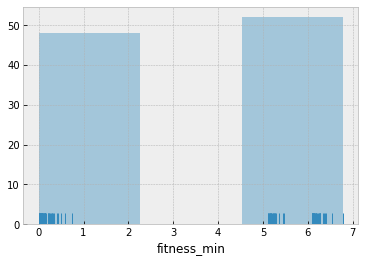

In [19]:
sns.distplot(fitness_res[query]['fitness_min'], rug=True, kde=False)

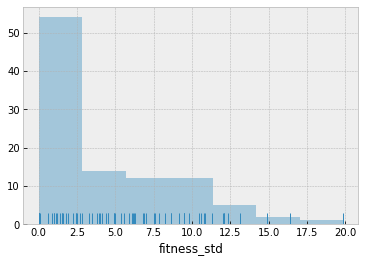

In [20]:
sns.distplot(fitness_res[query]['fitness_std'], rug=True, kde=False)

## Checking movement of population

In [14]:
#Visualization parameters
grph_steps = 61
a=15
b=-60
ratio_w=1.3
ln=.75


Generation 0


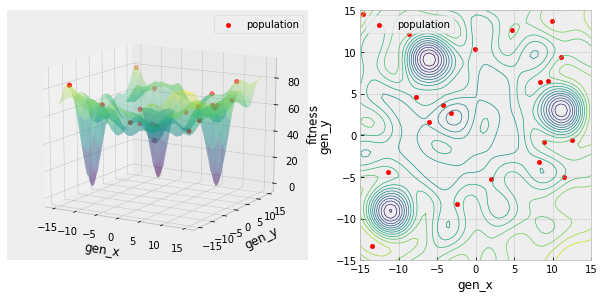

Generation 5


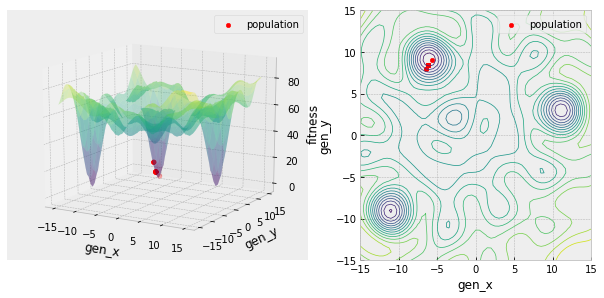

Generation 10


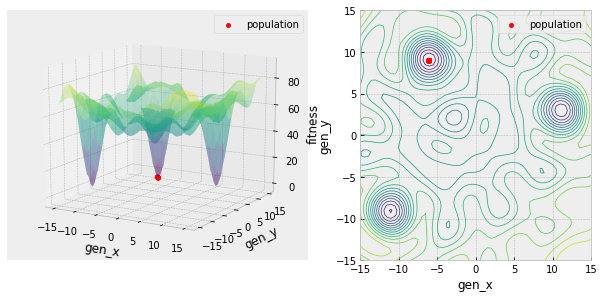

Generation 20


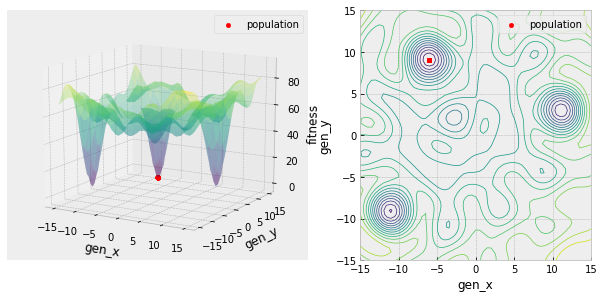

Generation 30


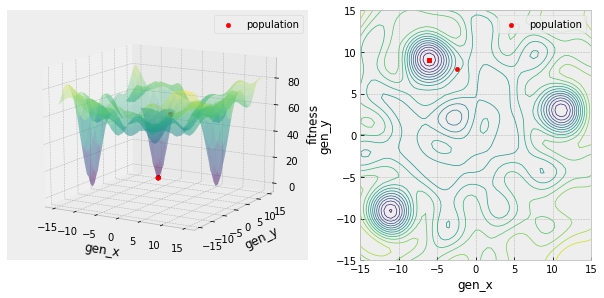

Generation 40


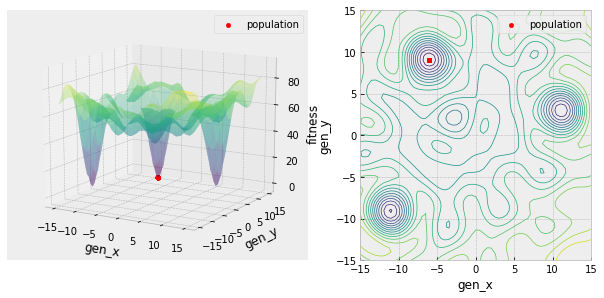

Generation 45


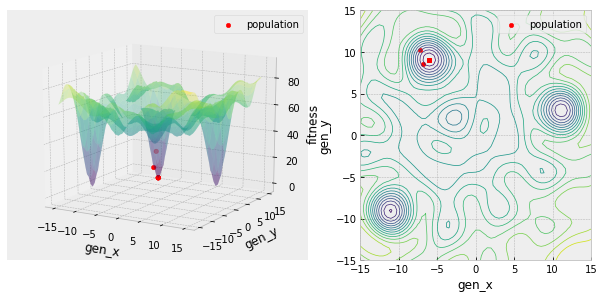

Generation 50


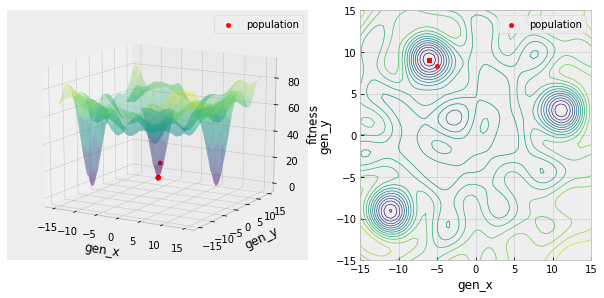

In [15]:
run_s = 97

print('Generation 0')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 0, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 5')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 5, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 10')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 10, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 20')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 20, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 30')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 30, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 40')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 40, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 45')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 45, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 50')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 50, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)

Generation 0


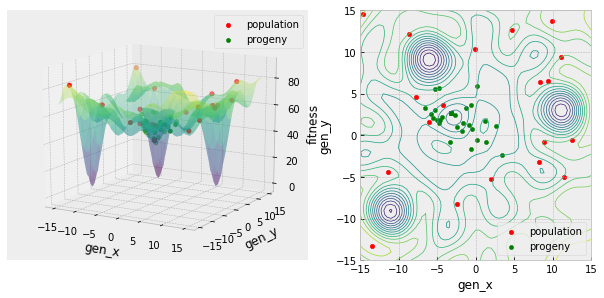

Generation 5


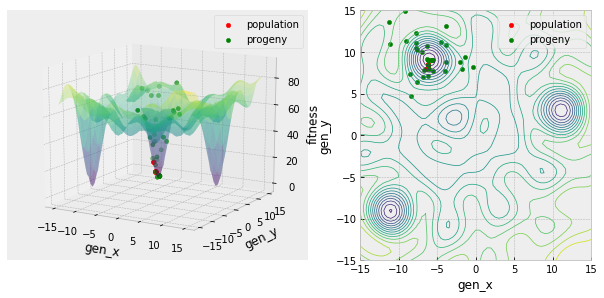

Generation 10


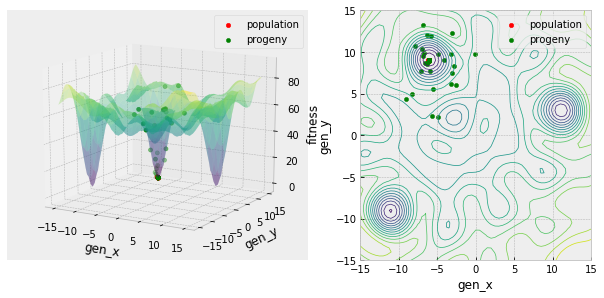

Generation 20


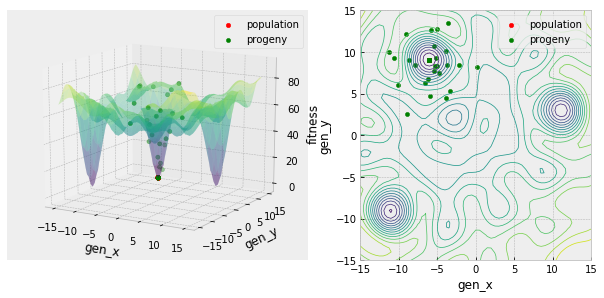

Generation 30


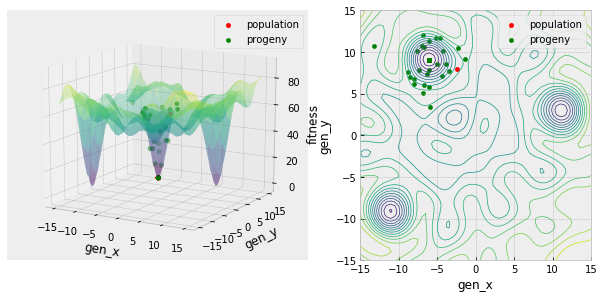

Generation 40


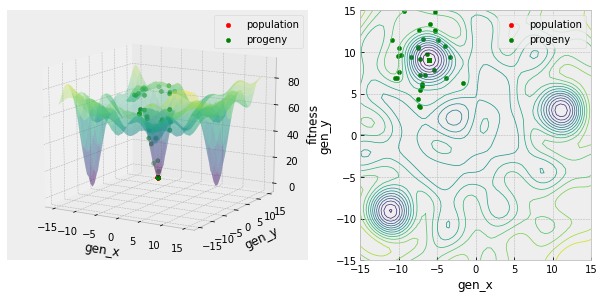

Generation 45


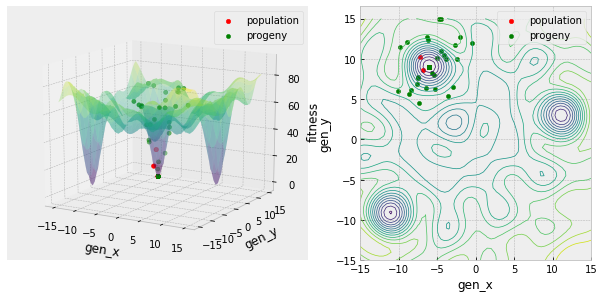

Generation 49


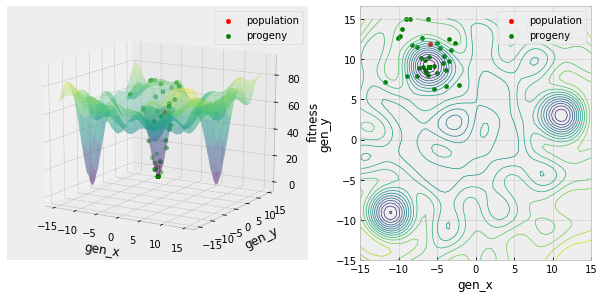

In [16]:
print('Generation 0')
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, 0, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 5')
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, 5, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 10')
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, 10, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 20')
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, 20, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 30')
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, 30, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 40')
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, 40, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 45')
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, 45, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 49')
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, 49, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)

In [17]:
time_c = datetime.datetime.now()
print(time_c)
print(time_c-time_a)

2019-05-12 10:42:31.673636
0:02:00.448320


In [18]:
np.sinc(3.5/np.pi)

-0.1002237793398915